# Customer Churn Analysis

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Downlaod Files:                                             
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [515]:
import pandas as pd
df=pd.read_csv("Telecom_customer_churn.csv")

In [516]:
pd.set_option('display.max_columns',None)

In [517]:
df.sample(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3856,6710-HSJRD,Male,0,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,114.10,7132.15,No
4607,2853-CWQFQ,Male,0,No,Yes,1,Yes,No,DSL,No,No,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,59.55,59.55,No
4201,1166-PQLGG,Female,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.55,1463.45,No
2221,8619-IJNDK,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),64.05,4492.9,No
1834,8080-DDEMJ,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.10,45.1,Yes
5509,1809-DMJHQ,Female,0,No,Yes,5,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,46.00,221.7,Yes
3004,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
5350,1172-VIYBP,Male,0,Yes,Yes,53,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,No
5340,5032-USPKF,Female,0,No,No,38,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),84.10,3187.65,No
1737,8887-IPQNC,Female,0,Yes,No,7,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,44.25,313.45,No


In [518]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we see that there is no null value in the dataset.                                            
this is good for our EDA process and Machine Learning.                                                 

In [519]:
#checking shape after droping
df.shape

(7043, 21)

our dataframe has 7043 rows and 21 columns.It means we have 7043 customer's 21 type of data.

# Exploratory Data Analysis(EDA)

In [520]:
#import visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [521]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [522]:
df.dtypes.index

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [523]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]


In [524]:
len(categorical_columns)

18

In [525]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['SeniorCitizen', 'tenure', 'MonthlyCharges']
[2, 5, 18]


In [526]:
len(numerical_columns)

3

we have only 3 numerical columns out of 21 columns.

# Univariate Analysis:

Categorical Column:

column Name: customerID


6366-ZGQGL    1
9057-MSWCO    1
5049-MUBWG    1
9239-GZHZE    1
7128-GGCNO    1
             ..
9526-JAWYF    1
5170-PTRKA    1
3815-SLMEF    1
3317-VLGQT    1
4067-HLYQI    1
Name: customerID, Length: 7043, dtype: int64


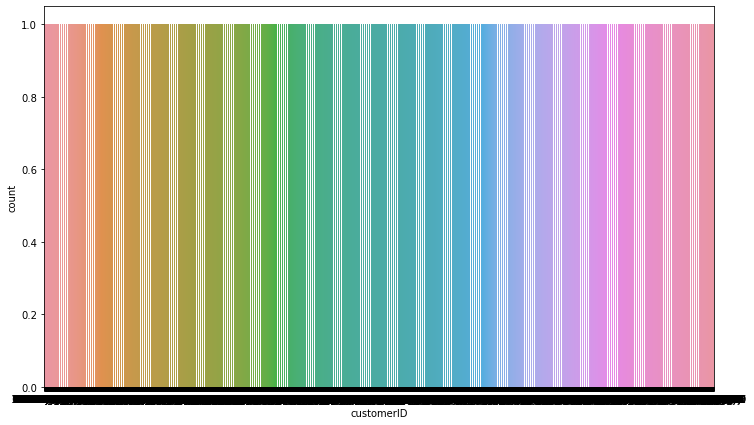



####################################################################################################


In [527]:
i=0 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

customer id is the unique id of each customer.so,we drop this column

In [433]:
#append "customerID" column in drop_columns list
drop_columns=[]
drop_columns.append("customerID")

column Name: gender


Male      3555
Female    3488
Name: gender, dtype: int64
len= 2


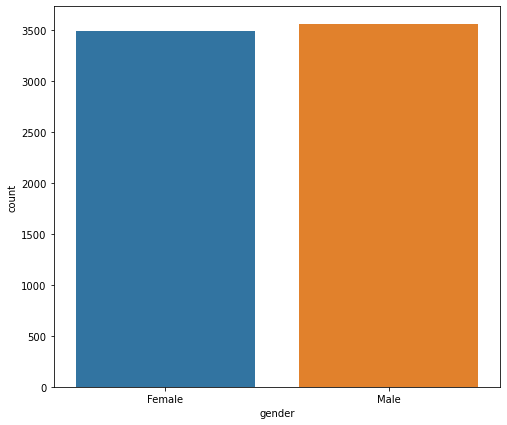

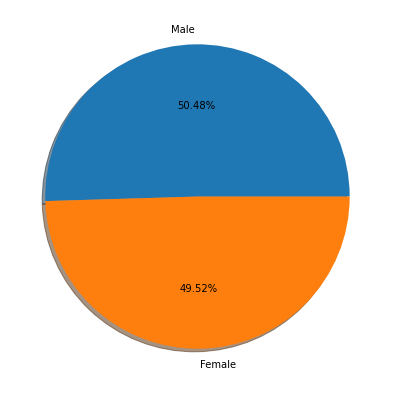



###############################################################################################################################


In [529]:
i=1 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,7))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

we can see that the number of male customer nearly equal to the number of female customer.

column Name: Partner


No     3641
Yes    3402
Name: Partner, dtype: int64
len= 2


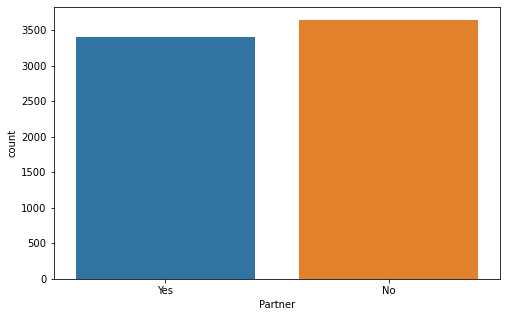

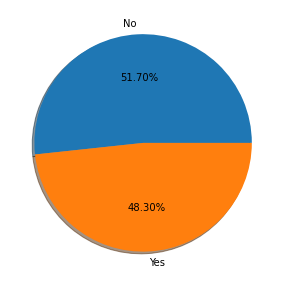



###############################################################################################################################


In [530]:
i=3 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

column Name: Dependents


No     4933
Yes    2110
Name: Dependents, dtype: int64
len= 2


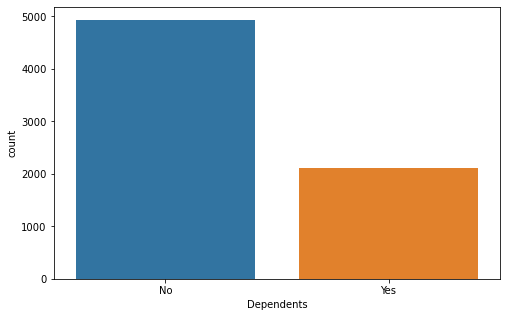

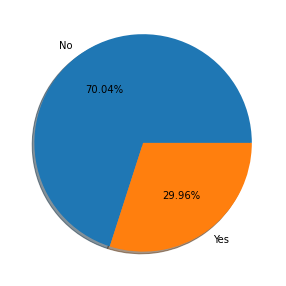



###############################################################################################################################


In [531]:
i=4 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

most of the customer is independeant

column Name: PhoneService


Yes    6361
No      682
Name: PhoneService, dtype: int64
len= 2


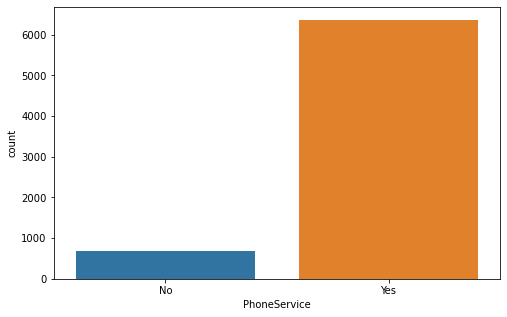

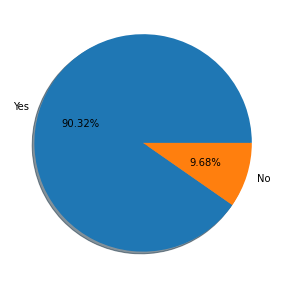



###############################################################################################################################


In [532]:
i=6 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

maximum customer using the phone service

column Name: MultipleLines


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
len= 3


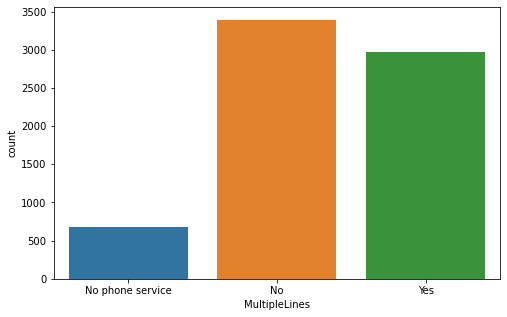

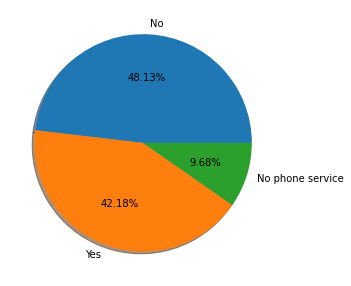



###############################################################################################################################


In [533]:
i=7 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

-maximum customer do not use Multiple Lines.                                                                
-we can see that phoneservice data include in Multiple Line column.                                              
-so,we drop PhoneService column.                                                 

In [439]:
#append "MultipleLines" column in drop_columns list
drop_columns.append("MultipleLines")

column Name: InternetService


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
len= 3


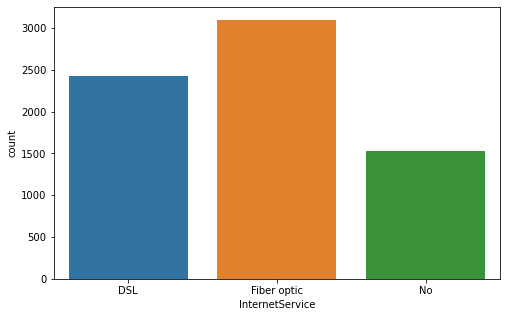

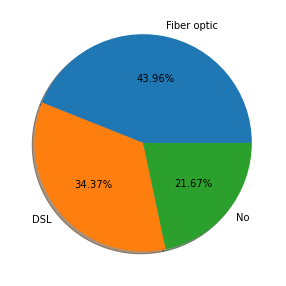



###############################################################################################################################


In [534]:
i=8 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

there are two types of Internet Service               
1.Fiber Optic                                                 
2.DSL                                                     
macimum people who using internet uses Fiber Optic internet service                                             

column Name: OnlineSecurity


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
len= 3


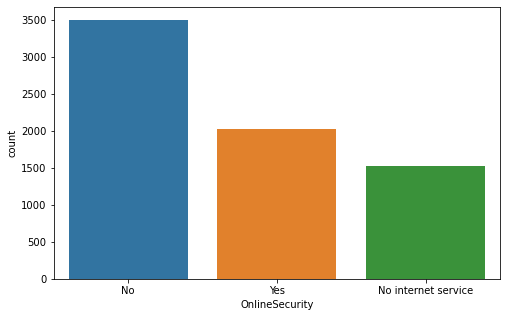

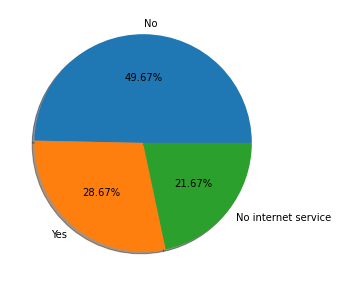



###############################################################################################################################


In [535]:
i=9 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

Maximum people do not use Online Security.

column Name: OnlineBackup


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
len= 3


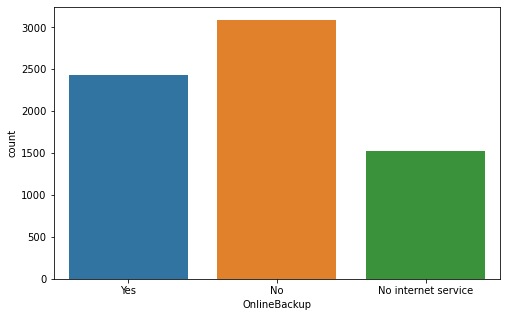

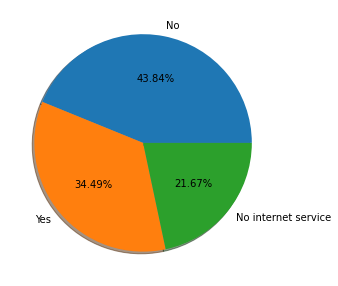



###############################################################################################################################


In [536]:
i=10 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

There are three optiion for online backup but the maximum customer do not use online backup.

column Name: DeviceProtection


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
len= 3


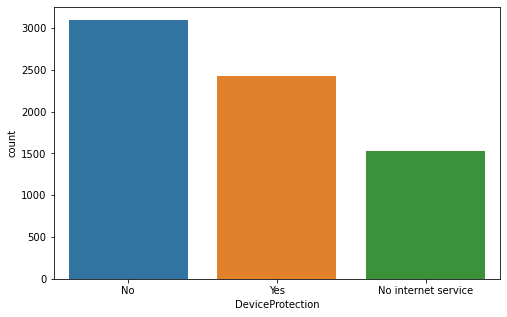

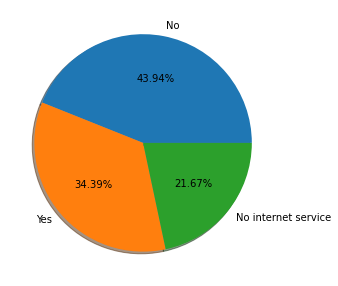



###############################################################################################################################


In [537]:
i=11 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

they have Device protection service but only 35% customer use this.

column Name: TechSupport


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
len= 3


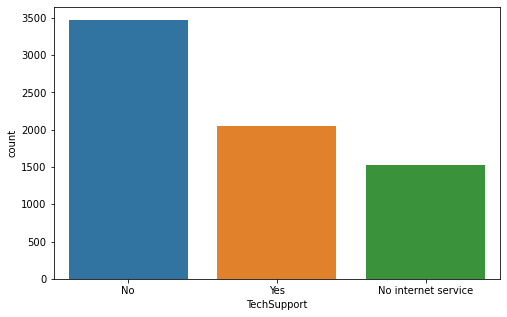

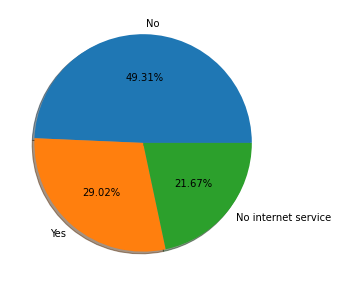



###############################################################################################################################


In [538]:
i=12 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

they have tech support service but 50% customer do not use this service.                                   
only 30% prople use tis service

column Name: StreamingTV


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
len= 3


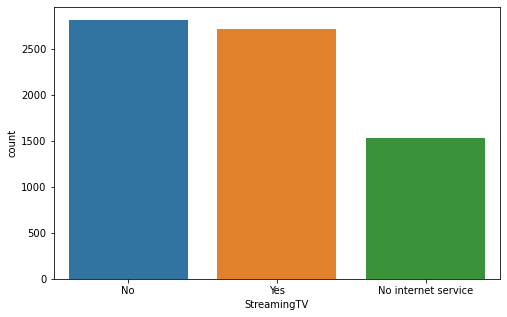

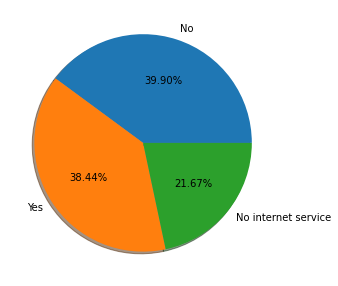



###############################################################################################################################


In [539]:
i=13 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

company has streaming TV option                                  
60% people do not use this                             
only 40% people use this                                              

column Name: StreamingMovies


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
len= 3


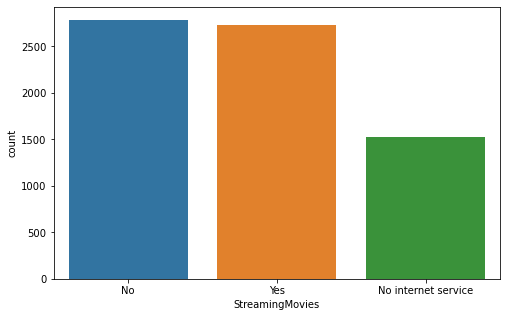

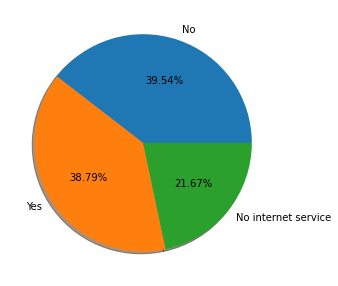



###############################################################################################################################


In [540]:
i=14 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

only 40% customers are using streaming movies option

column Name: Contract


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
len= 3


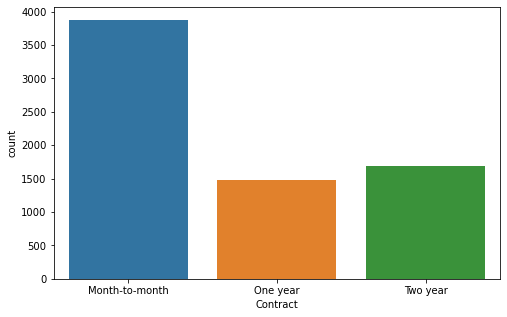

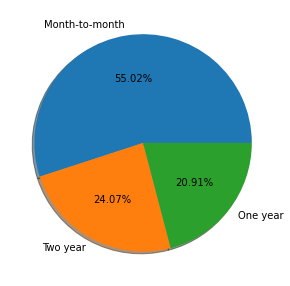



###############################################################################################################################


In [542]:
i=15 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

55% customer use month to month contruct option                 
20% people use one year contruct option                                          
24% people use two year contruct option                                                       

column Name: PaperlessBilling


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
len= 2


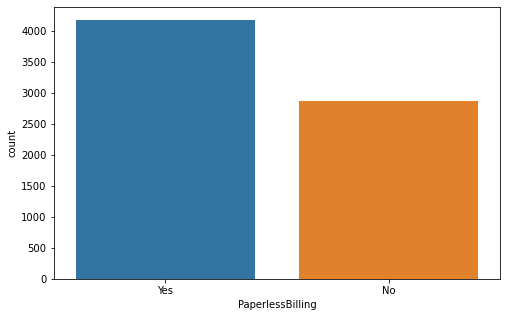

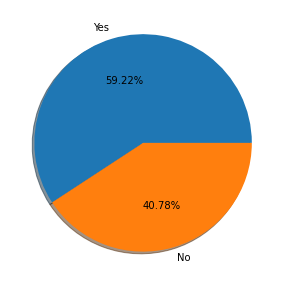



###############################################################################################################################


In [543]:
i=16 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

60% customer use paperless billing and 40% people do not use paperless 

column Name: PaymentMethod


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
len= 4


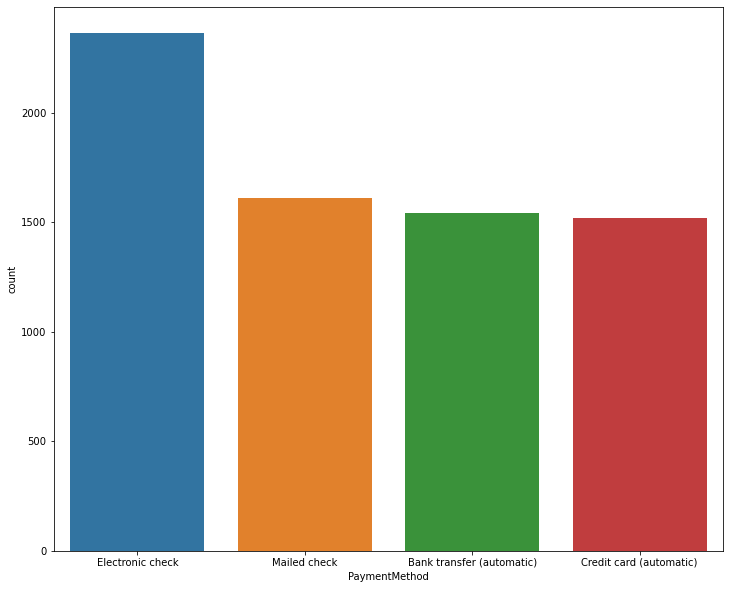

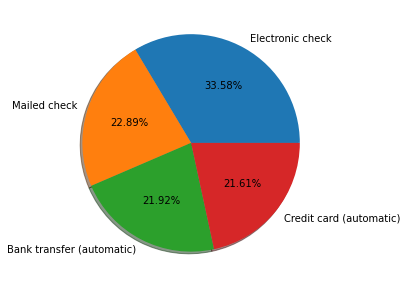



###############################################################################################################################


In [545]:
i=17 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,10))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

#34% people use electronic check to make payment                               
#23% people use mailed check to make payment                                   
#22% people use bank transfer to make payment                            
#22% people use credit card to make payment                                    

column Name: TotalCharges


           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
8100.25     1
6631.85     1
4533.7      1
702         1
469.8       1
Name: TotalCharges, Length: 6531, dtype: int64


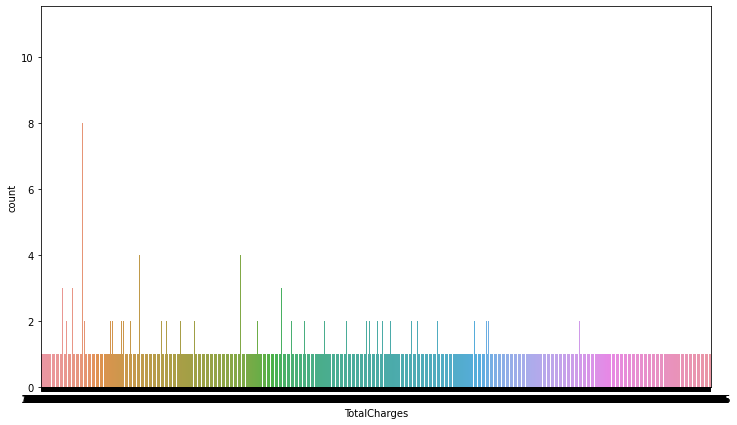



####################################################################################################


In [450]:
i=19 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we can see that some space value present in the column                           
so,we convert this space value into NaN value

In [451]:
# checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [452]:
# Some space are presents in the dataset, convert them into NaN
import numpy as np
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [453]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [454]:
# converting the object data type into float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

column Name: TotalCharges


20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64


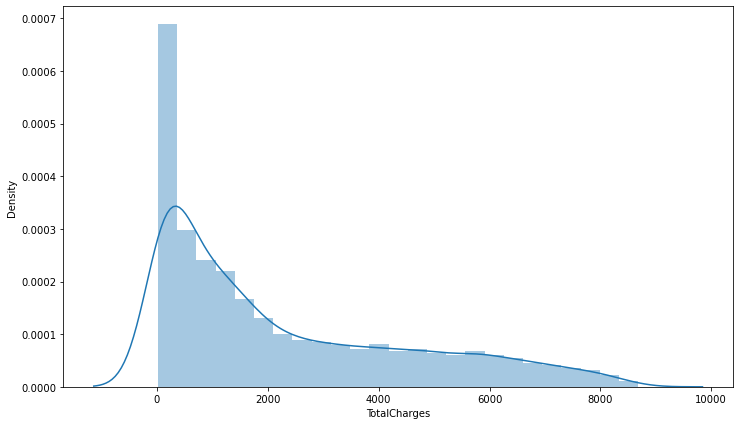



####################################################################################################


In [455]:
i=19 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

left skewness present in the column

column Name: Churn


No     5174
Yes    1869
Name: Churn, dtype: int64
len= 2


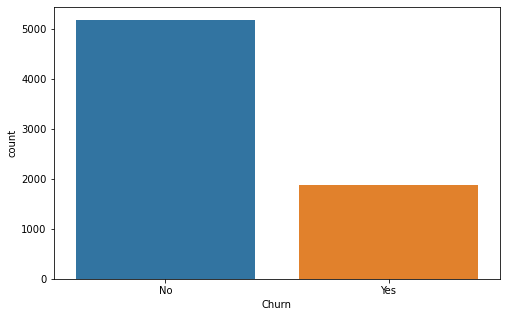

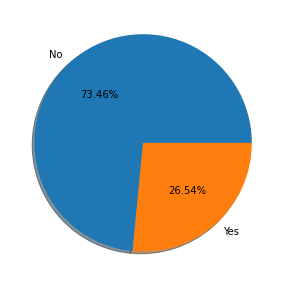



###############################################################################################################################


In [550]:
i=20 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

#73% customer's churn is no                                          
#26% customer's churn is yes                            

this is our target column.we have to predict this.                                               
clearly we can see that the class is imbalamced.we will balance it later on.

Numerical Column:

column Name: SeniorCitizen


0    5901
1    1142
Name: SeniorCitizen, dtype: int64
len= 2


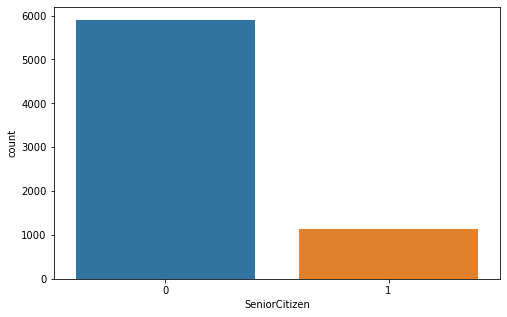

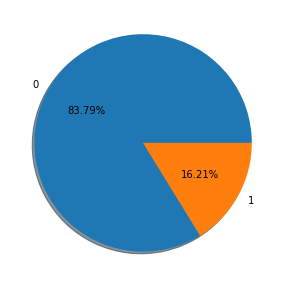



###############################################################################################################################


In [548]:
i=2 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

column Name: tenure


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


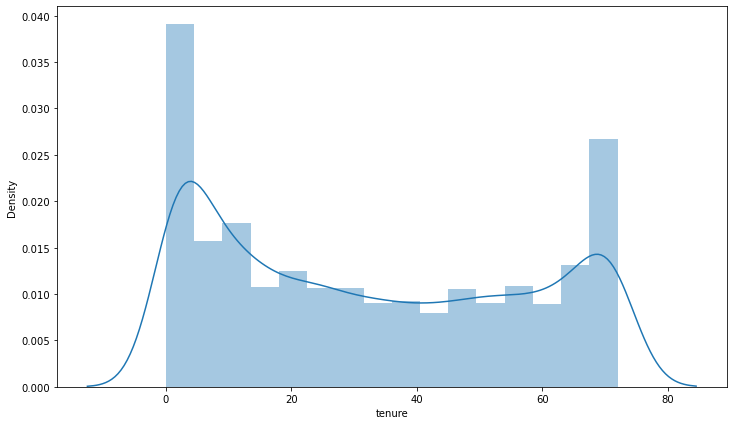



####################################################################################################


In [458]:
i=5 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

some skewness present in the data.

column Name: MonthlyCharges


20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64


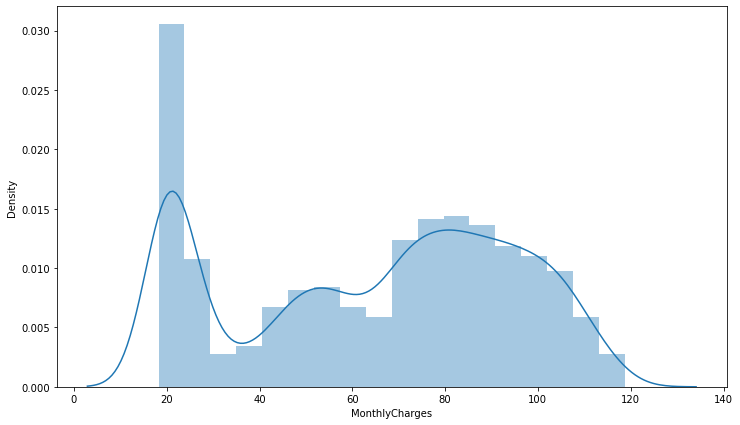



####################################################################################################


In [459]:
i=18 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

positive skewness present in the data.

# Bivariate Analysis:

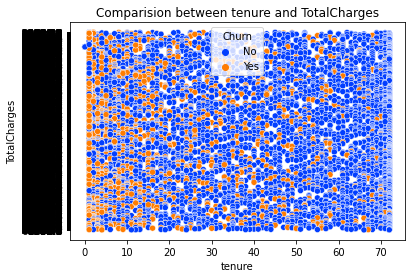

In [553]:
# comparing tenure and TotalCharges
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot(x="tenure",y="TotalCharges",data=df,hue="Churn",palette="bright")
plt.show()

Here we can notice that there is no relation between total charges and tenure

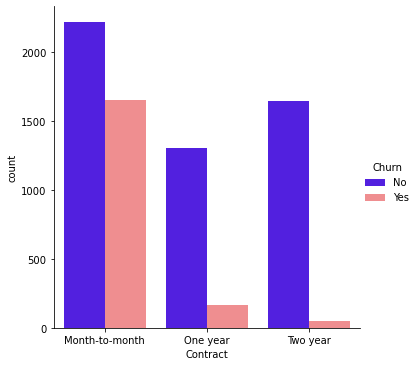

In [555]:
# checking Churn level in Contract
sns.catplot(x="Contract",hue='Churn',data=df,palette="gnuplot2",kind="count")
plt.show()

In [556]:
#The customer who have churend are mostely having month to month contract

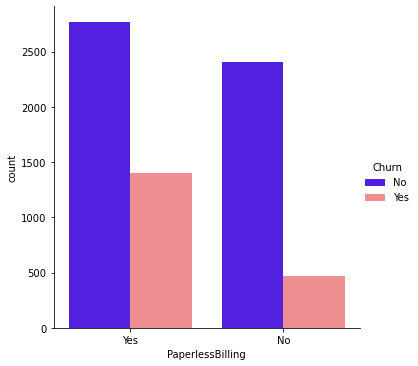

In [558]:
# checking Churn level in PaperlessBilling
sns.catplot(x="PaperlessBilling",hue='Churn',data=df,palette="gnuplot2",kind="count")
plt.show()

The customer who have churnrd are mostly using paperless billing

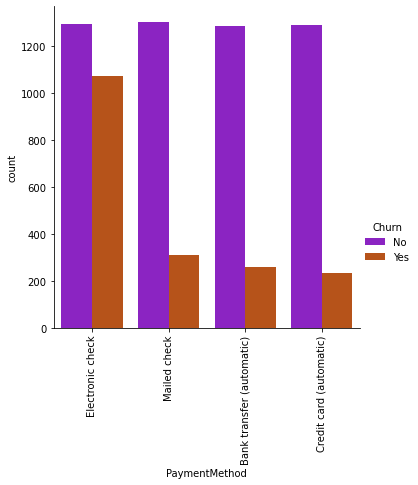

In [559]:
# checking Churn level in PaymentMethod
sns.catplot(x="PaymentMethod",hue='Churn',data=df,palette="gnuplot",kind="count")
plt.xticks(rotation=90)
plt.show()


The customers who prefer Electronic check have high churn rate.

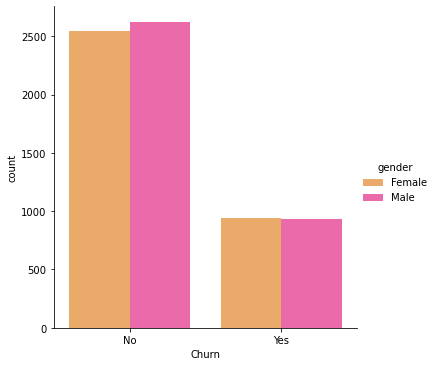

In [566]:
# checking Churn level and gender
sns.catplot(x="Churn",hue='gender',data=df,kind="count",palette="spring_r")

we can see there is no significance difference in the genders, both the genders have mostly equal churn level

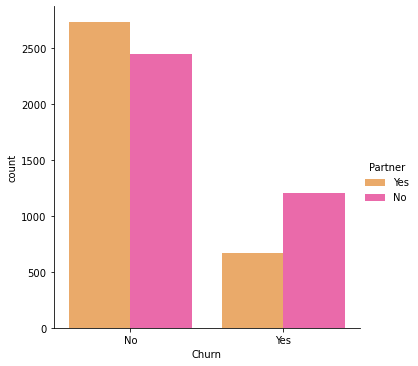

In [569]:
# checking Churn level and Partner
sns.catplot(x="Churn",hue='Partner',data=df,palette="spring_r",kind="count")

we see that the customer without partners have high churn rate comapare to customer with partner

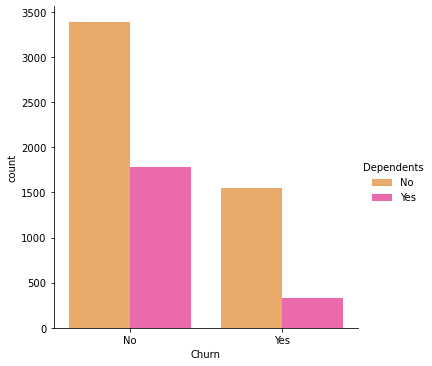

In [572]:
# checking Churn level and Dependents
sns.catplot(x="Churn",hue='Dependents',data=df,palette="spring_r",kind="count")

the independent customer have high churn rate compare to dependent customer.

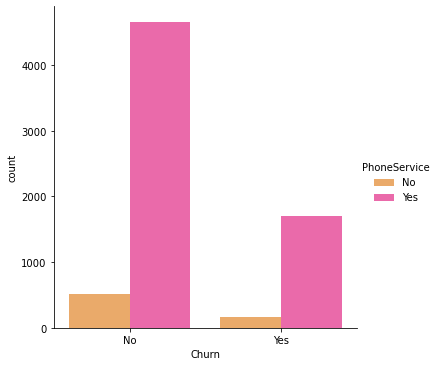

In [573]:
# checking Churn level and PhoneService
sns.catplot(x="Churn",hue='PhoneService',data=df,palette="spring_r",kind="count")
plt.show()

we can notice the customers who have phone service have high tendency of getting churned

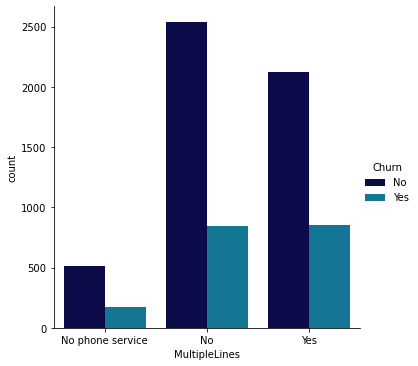

In [574]:
# checking Churn level and Multiplelines
sns.catplot(x="MultipleLines",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services

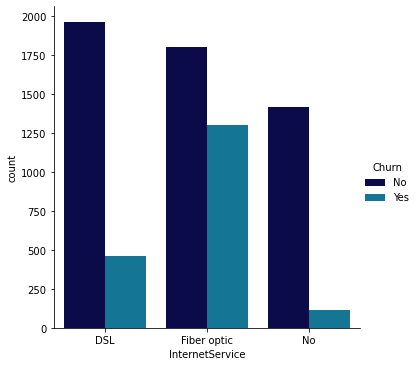

In [576]:
# checking Churn level in InternetService
sns.catplot(x="InternetService",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

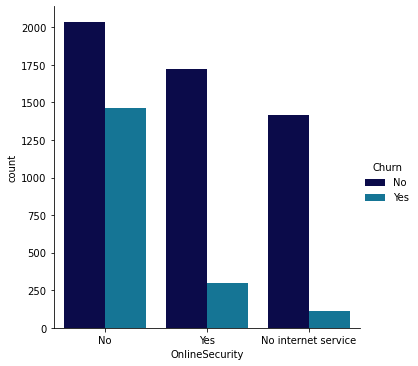

In [577]:
# checking Churn level in OnlineSecurity
sns.catplot(x="OnlineSecurity",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned

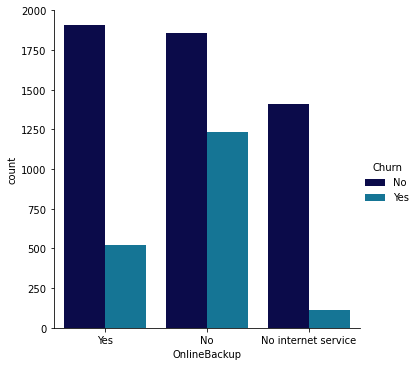

In [578]:
# checking Churn level in OnlineBackup
sns.catplot(x="OnlineBackup",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup.

The customers who do not have online backup services they have high churn rate.

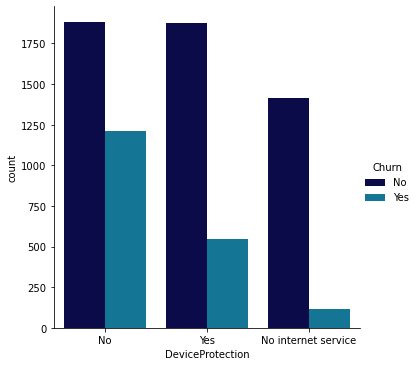

In [579]:
# checking Churn level in DeviceProtection
sns.catplot(x="DeviceProtection",hue='Churn',data=df,palette="ocean",kind="count")
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others

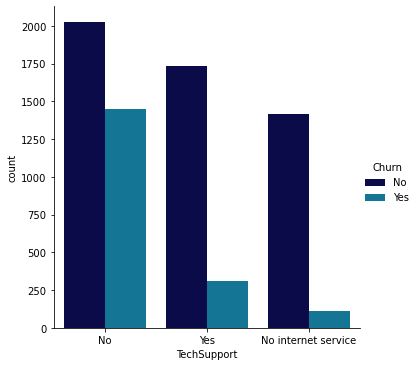

In [580]:
# checking Churn level in TechSupport
sns.catplot(x="TechSupport",hue='Churn',data=df,palette="ocean",kind="count")

Here we can clearly see that the customers who do not have any techsupport then they have high churn ration

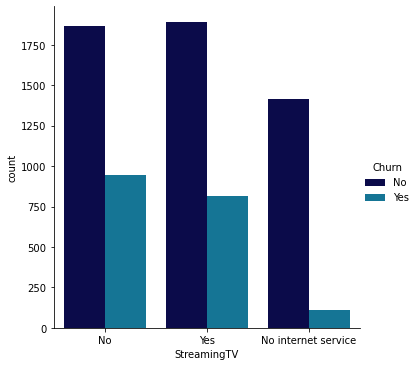

In [581]:
# checking Churn level in StreamingTV
sns.catplot(x="StreamingTV",hue='Churn',data=df,palette="ocean",kind="count")

The churn rate is nearly same if the customer own StreamingTV or not.

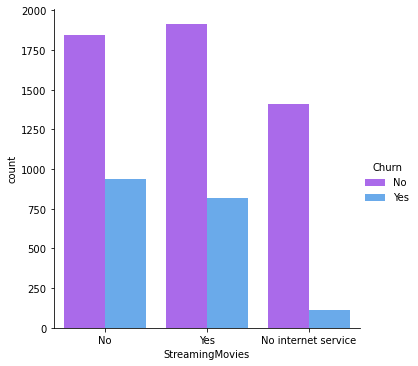

In [582]:
# checking Churn level in StreamingMovies
sns.catplot(x="StreamingMovies",hue='Churn',data=df,palette="cool_r",kind="count")
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.

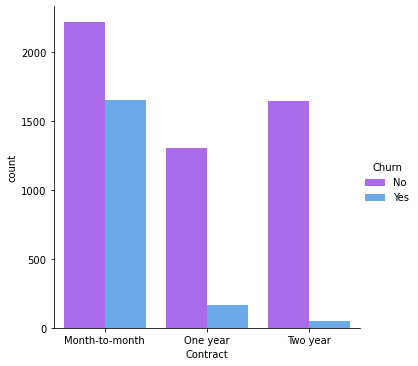

In [583]:
# checking Churn level in Contract
sns.catplot(x="Contract",hue='Churn',data=df,palette="cool_r",kind="count")
plt.show()

The customer who have churend are mostely having month to month contract

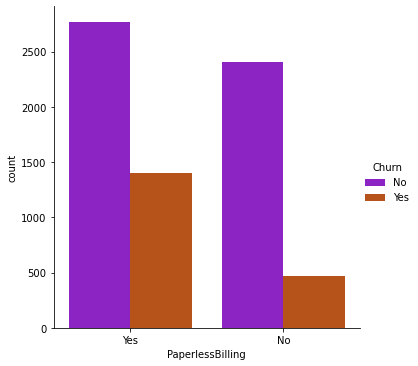

In [584]:
# checking Churn level in PaperlessBilling
sns.catplot(x="PaperlessBilling",hue='Churn',data=df,palette="gnuplot",kind="count")
plt.show()

The customers who prefer paperless billing they have high churn rate.

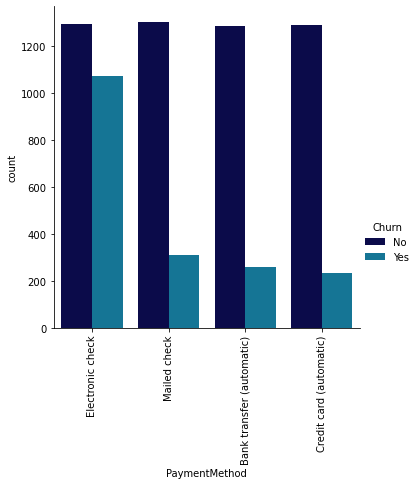

In [585]:
# checking Churn level in PaymentMethod
sns.catplot(x="PaymentMethod",hue='Churn',data=df,palette="ocean",kind="count")
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

# Multivariate Analysis:

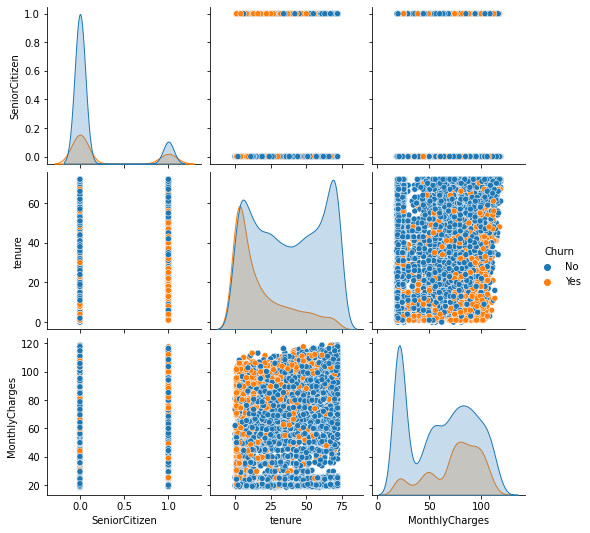

In [562]:
sns.pairplot(df,hue='Churn')

In [552]:
#The pairplot gives the pairwise relation between the features on the basis of the target "Churn" On the diagonal we can notice the distribution plots.

#we have only three numeric type columns others are categorical type.

#We do not see any pairs that have a linear relationship.

#The curve of senior citizen column likes a normal distribution curve.

#positive skewness present in Monthly charges column.

since we have only two numerival columns,we do not remove any column by checking VIF score.                       
we only remove outliers.

# Checking Outliers:

column Name: tenure


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


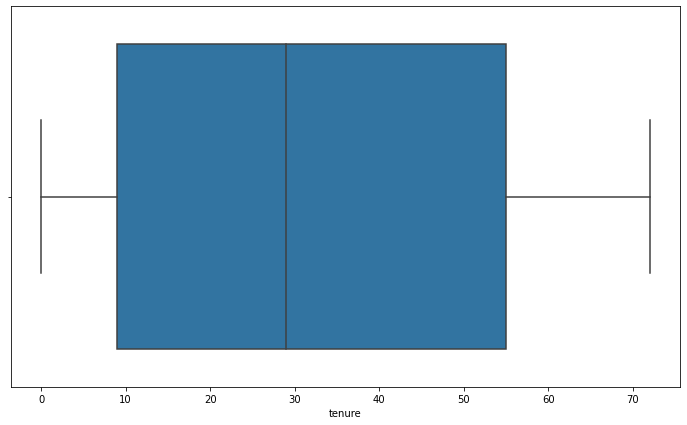



####################################################################################################


In [460]:
i=5 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.boxplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: MonthlyCharges


20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64


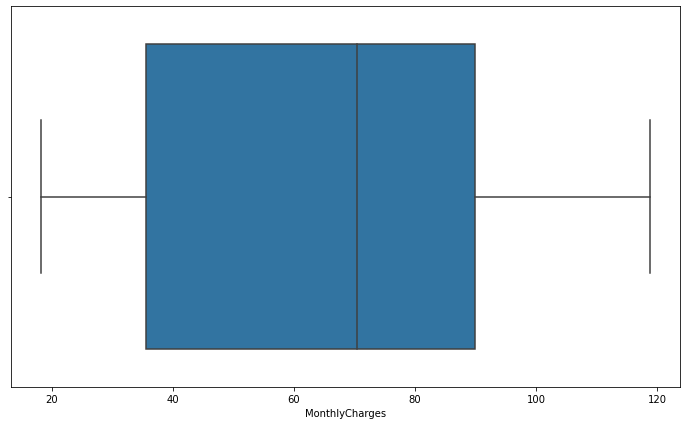



####################################################################################################


In [461]:
i=18 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.boxplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

column Name: TotalCharges


20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64


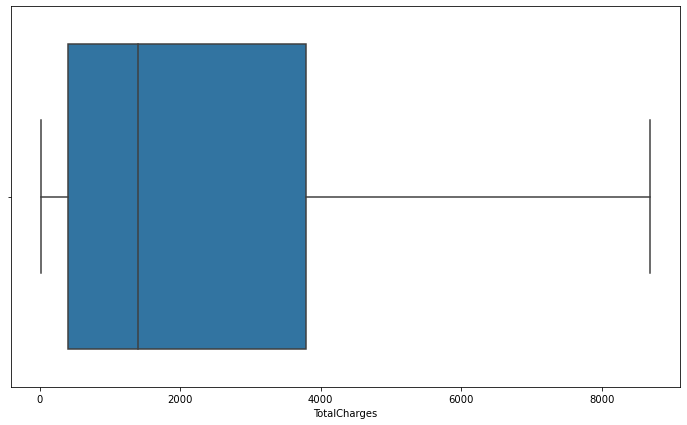



####################################################################################################


In [462]:
i=19 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.boxplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we have no outliers in the dataset.

Drop that column which i stored in drop_column list.

In [463]:
df=df.drop(drop_columns,axis=1)

In [464]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [465]:
df.shape

(7043, 19)

# Outliers Checking using zscore

In [466]:
#import zscore
from scipy.stats import zscore

In [467]:
outliers_column=df[["tenure","TotalCharges","MonthlyCharges"]]

In [468]:
z=np.abs(zscore(outliers_column))
z

array([[1.27744458,        nan, 1.16032292],
       [0.06632742,        nan, 0.25962894],
       [1.23672422,        nan, 0.36266036],
       ...,
       [0.87024095,        nan, 1.1686319 ],
       [1.15528349,        nan, 0.32033821],
       [1.36937906,        nan, 1.35896134]])

In [469]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


we have no outliers

In [470]:
#checking skewness
outliers_column.skew()

tenure            0.239540
TotalCharges      0.961642
MonthlyCharges   -0.220524
dtype: float64

some skewness present in the "TotalCharges" column.we will handle it later on.

In [471]:
#Describing the dataset
outliers_column.describe()

,tenure,TotalCharges,MonthlyCharges
count,7043.000000,7032.000000,7043.000000
mean,32.371149,2283.300441,64.761692
std,24.559481,2266.771362,30.090047
min,0.000000,18.800000,18.250000
25%,9.000000,401.450000,35.500000
50%,29.000000,1397.475000,70.350000
75%,55.000000,3794.737500,89.850000
max,72.000000,8684.800000,118.750000


we can see that:-                                         
difference between mean and 50th percentile of TotalCharges Column is high.It means that skewness present in the TotalCharges Column.                                                                                      
difference between 75th percentile and max of the each column is very less.It means that no outliers present in this columns. 

# Filling Missing Value:

In [472]:
#filling missing value by mean value
df["TotalCharges"]=df["TotalCharges"].replace(np.nan,df["TotalCharges"].mean())

In [473]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there is no missing value in the dataset.we move to the next step label encoding.

# LabelEncoding:

In [474]:
df.nunique().to_frame('unique values')

,unique values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3


In [475]:
df.shape

(7043, 19)

In [476]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in range(19):
    if df[df.columns[i]].nunique()<=4:
        df[df.columns[i]]=le.fit_transform(df[df.columns[i]]).astype(float)

In [477]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0.0,0.0,0.0,45,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,0.0,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0.0,1.0,1.0,72,1.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0.0,1.0,1.0,11,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1.0,1.0,0.0,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [478]:
#checking info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   InternetService   7043 non-null   float64
 7   OnlineSecurity    7043 non-null   float64
 8   OnlineBackup      7043 non-null   float64
 9   DeviceProtection  7043 non-null   float64
 10  TechSupport       7043 non-null   float64
 11  StreamingTV       7043 non-null   float64
 12  StreamingMovies   7043 non-null   float64
 13  Contract          7043 non-null   float64
 14  PaperlessBilling  7043 non-null   float64
 15  PaymentMethod     7043 non-null   float64
 16  MonthlyCharges    7043 non-null   float64


In [479]:
#checking correlation
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525
DeviceProtection,0.000549,-0.021398,0.166330,0.080537,0.371105,0.003727,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,-0.038234,-0.135750,0.163652,0.388864,-0.178134


correlation with target column is not good for each columns

# Dividing data in features and vectors:

In [480]:
x=df.drop("Churn",axis=1) #Independent variable
y=df.iloc[:,-1] #Dependent variable

In [481]:
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0            0.0      1.0         0.0       1           0.0   
1        1.0            0.0      0.0         0.0      34           1.0   
2        1.0            0.0      0.0         0.0       2           1.0   
3        1.0            0.0      0.0         0.0      45           0.0   
4        0.0            0.0      0.0         0.0       2           1.0   
...      ...            ...      ...         ...     ...           ...   
7038     1.0            0.0      1.0         1.0      24           1.0   
7039     0.0            0.0      1.0         1.0      72           1.0   
7040     0.0            0.0      1.0         1.0      11           0.0   
7041     1.0            1.0      1.0         0.0       4           1.0   
7042     1.0            0.0      0.0         0.0      66           1.0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                 0.0             0.0 

In [482]:
print(y)

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64


# Oversampling:

In [483]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [484]:
x,y=smt.fit_resample(x,y)

In [485]:
x.value_counts()

gender  SeniorCitizen  Partner   Dependents  tenure  PhoneService  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0.0     0.000000       0.000000  0.000000    1       1.000000      1.000000         0.0             0.000000      0.000000          0.0          0.000000     0.000000         0.0       1.0               3.000000       70.150000       70.150000       5
1.0     0.000000       0.000000  0.000000    1       1.000000      2.000000         1.0             1.000000      1.000000          1.0          1.000000     1.000000         0.0       0.0               3.000000       20.150000       20.150000       5
                                                                                                                                                                                                                          20.200000       20.200000      

In [486]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

we can see that total number of 0 = total number of 1

# Transforming data to remove skewness:

In [487]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.07220401, -0.55538407,  1.13831029, ...,  0.34494714,
        -1.32956379, -1.74190253],
       [ 1.03358257, -0.55538407, -0.95570985, ...,  1.4346886 ,
        -0.44498359,  0.39596475],
       [ 1.03358257, -0.55538407, -0.95570985, ...,  1.4346886 ,
        -0.55169712, -1.26508028],
       ...,
       [-0.8744975 , -0.55538407,  1.13831029, ..., -0.61142204,
        -0.06416853,  1.1784235 ],
       [-0.27210032, -0.55538407, -0.95570985, ...,  0.34494714,
         0.24598081, -0.8923672 ],
       [ 1.03358257, -0.55538407, -0.95570985, ...,  0.34494714,
        -1.46611075, -1.79415847]])

In [488]:
#print skewness after power transform
df_new1=pd.DataFrame(x)
df_new1.skew()

0    -0.042650
1     1.282922
2     0.161901
3     0.948353
4    -0.160572
5    -2.687287
6    -0.075848
7     0.355733
8     0.110342
9     0.117855
10    0.337841
11   -0.065140
12   -0.080075
13    0.655165
14   -0.565977
15   -0.210491
16   -0.307415
17   -0.124932
dtype: float64

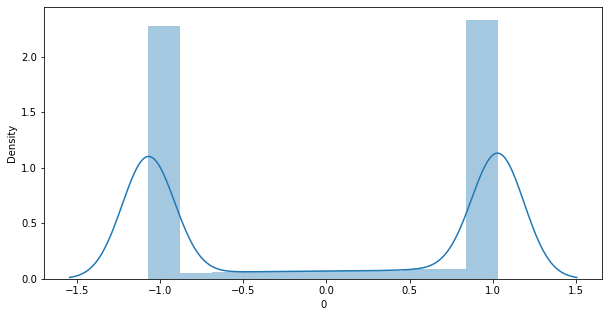

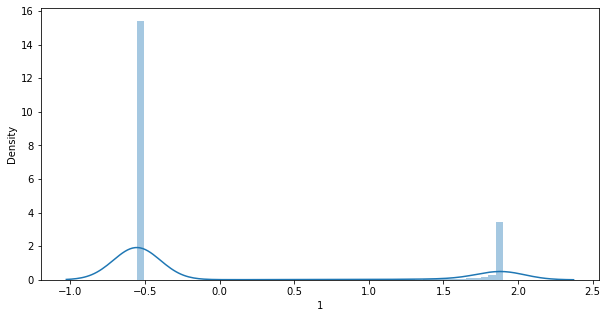

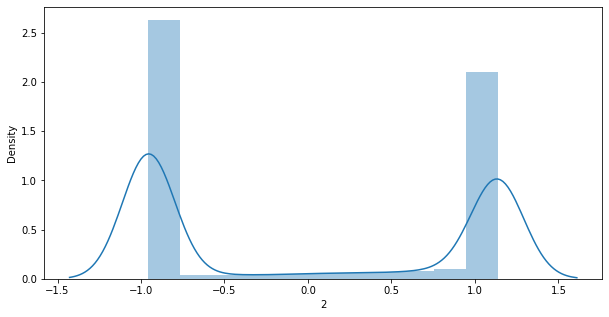

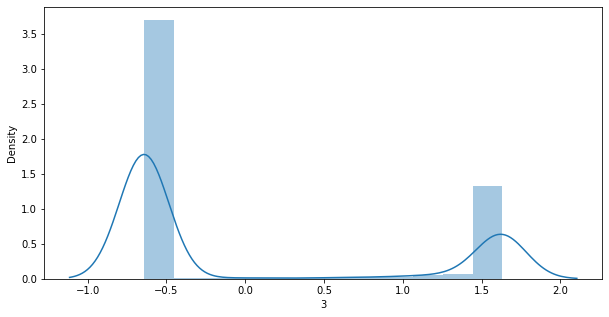

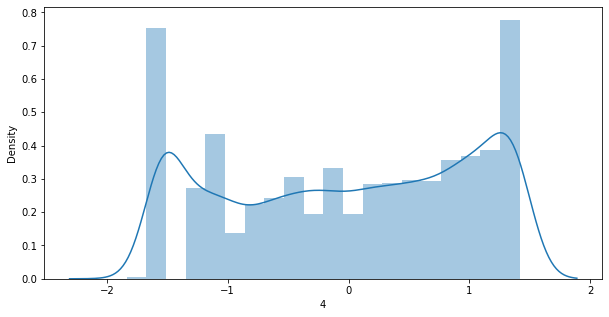

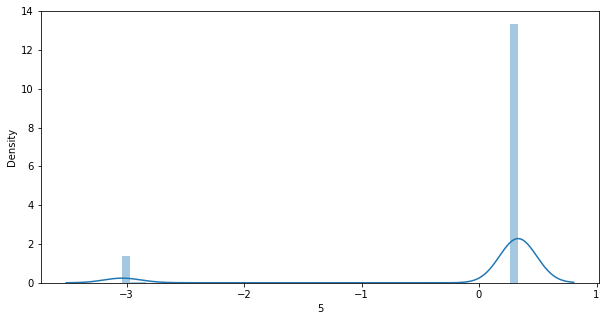

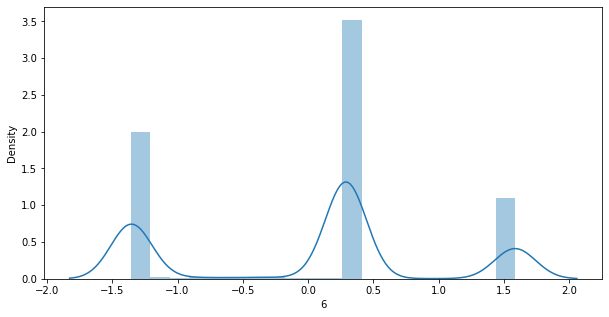

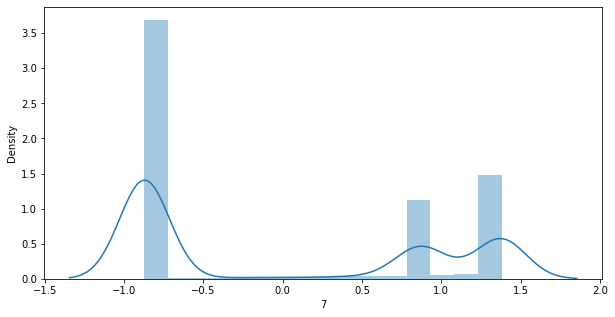

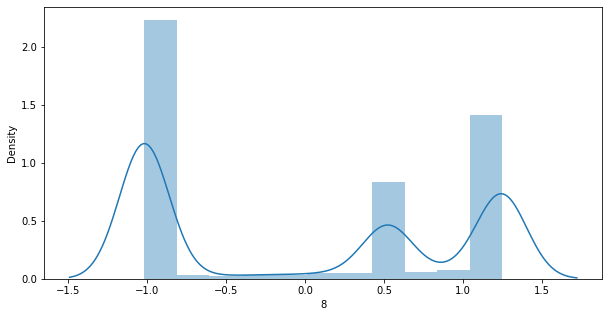

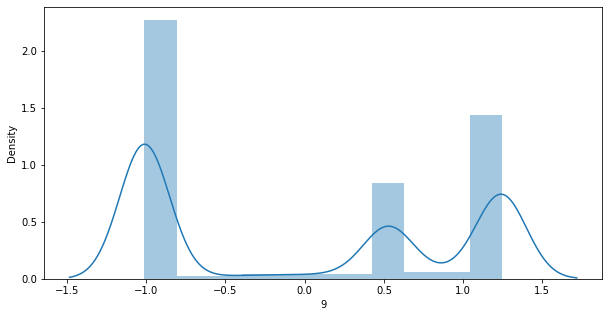

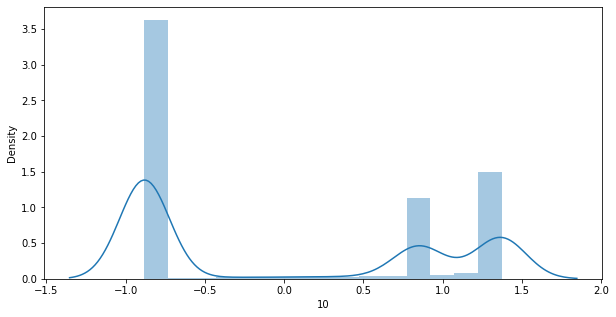

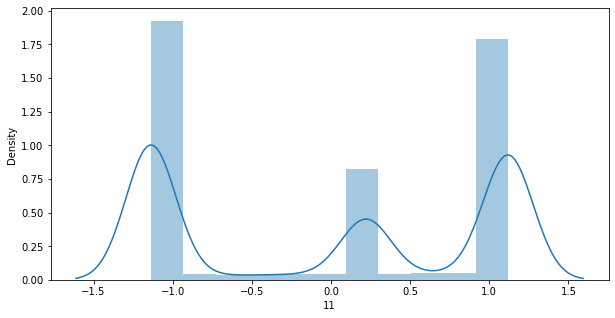

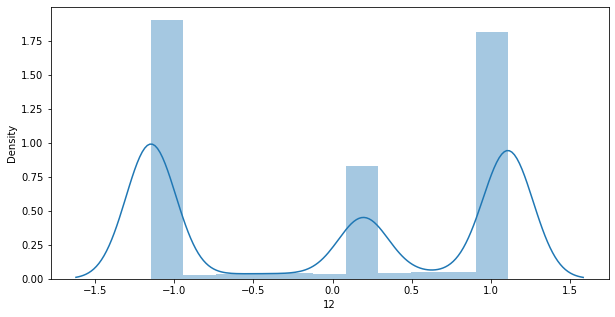

In [489]:
for i in range(13):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])
    plt.show()

now skewness is under control

# Standard Scalarization:

In [490]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.07220401, -0.55538407,  1.13831029, ...,  0.34494714,
        -1.32956379, -1.74190253],
       [ 1.03358257, -0.55538407, -0.95570985, ...,  1.4346886 ,
        -0.44498359,  0.39596475],
       [ 1.03358257, -0.55538407, -0.95570985, ...,  1.4346886 ,
        -0.55169712, -1.26508028],
       ...,
       [-0.8744975 , -0.55538407,  1.13831029, ..., -0.61142204,
        -0.06416853,  1.1784235 ],
       [-0.27210032, -0.55538407, -0.95570985, ...,  0.34494714,
         0.24598081, -0.8923672 ],
       [ 1.03358257, -0.55538407, -0.95570985, ...,  0.34494714,
        -1.46611075, -1.79415847]])

Now our Data is Ready for Model Building

# Model Building:

In [491]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [492]:
x.shape[0]

10348

In [493]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(0,10348):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.7971014492753623 on random state   9017


we get the best random state 9215.now we using this random state on train test split function.

In [494]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

In [495]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (7243, 18)
x_test shape = (3105, 18)
y_train shape = (7243,)
y_test shape = (3105,)


# Finding Best Model

In [496]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [497]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [498]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.7971014492753623
[[1188  340]
 [ 290 1287]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1528
         1.0       0.79      0.82      0.80      1577

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105

####################################################################################################
Accuracy score of  GaussianNB() is
0.77487922705314
[[1144  384]
 [ 315 1262]]
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77      1528
         1.0       0.77      0.80      0.78      1577

    accuracy                           0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105

#############################################################################

we get the best accuracy score 86% form GradientBoostingClassifier Model

# Checking Cross Val Score:

In [499]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.7632392732895246
cross validation score of GaussianNB() is = 0.7558948589099344
cross validation score of SVC() is = 0.7879783533049864
cross validation score of DecisionTreeClassifier() is = 0.7579242365674527
cross validation score of KNeighborsClassifier() is = 0.7675879396984924
cross validation score of RandomForestClassifier() is = 0.7935833011209896
cross validation score of GradientBoostingClassifier() is = 0.7870119829918825
cross validation score of AdaBoostClassifier() is = 0.7768650947042907
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.7690387888108715
cross validation score of GaussianNB() is = 0.7544452428275087
cross validation score of SVC() is = 0.8058660705406454
cross validation score of DecisionTreeClassifier() is = 0.7708881241219537
cross validation score of KNeighborsClassifier() 

we get best cross val score 85% from GradientBoostingClassifier model for cv=9

# Parameter Tuning:

In [500]:
#creating parameter list to pass in GreadSearchCV
parameters={'loss':['deviance', 'exponential'],'learning_rate':[0.1,0.01,0.001],'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}
gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=9,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance'}

In [513]:
gcv.best_score_

0.860831625172962

After parameter tuning we get accuracy score 86%.Accuravy score is not increasing

# Creating Final Model:

In [502]:
final_model=gcv.best_estimator_

In [503]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy score of final model = 0.8631239935587761
Train Accuracy score of final model = 0.8768466105205025
[[1309  219]
 [ 217 1360]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1528
         1.0       0.86      0.86      0.86      1577

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



we can see that test accuravy score is very close to the test accracy score.so,our model is not underfit or overfit.
so this our best model.we save this model for future prediction. 

<AxesSubplot:>

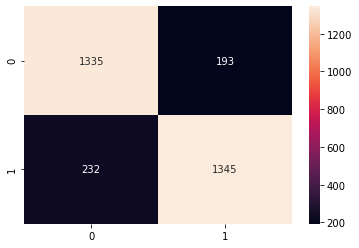

In [588]:
#Showing confusion matrix using Heatmap 
confusion_matrix(y_test,predm1)
sns.heatmap(confusion_matrix(y_test,predm1),annot=True, fmt='d')

# ROCAUC curve

In [504]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.41554477, 0.87819257, 0.33297891, ..., 0.5713645 , 0.86343372,
       0.04133966])

In [505]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [510]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print("roc_auc_score=",auc_score)

roc_auc_score= 0.863288162293705


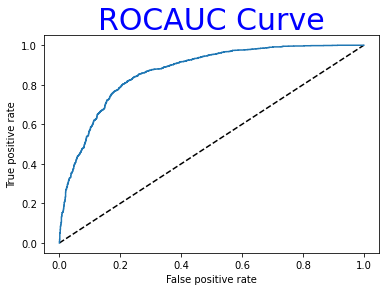

In [511]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROCAUC Curve',color='Blue',size=30)
plt.show()

In [512]:
MLdf=pd.DataFrame([final_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T
MLdf

,Predicted,Original
0,0.0,1.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3100,0.0,0.0
3101,0.0,0.0
3102,1.0,1.0
3103,1.0,1.0


# Model Saving:

In [514]:
#Save the final model                                                                      
import joblib                                                                                                     
#joblib.dump(final_model,'Customer Churn Analysis Project Model.pkl')